In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
m1,cov1 = np.array([1,5]),np.array([[1,0.1],[0.1,1]])
m2,cov2 = np.array([4,5.2]),np.array([[1,0.1],[0.1,1.2]])

dist1 = np.random.multivariate_normal(m1,cov1,500)
dist2 = np.random.multivariate_normal(m2,cov2,500)

print(dist1.shape,dist2.shape)


(500, 2) (500, 2)


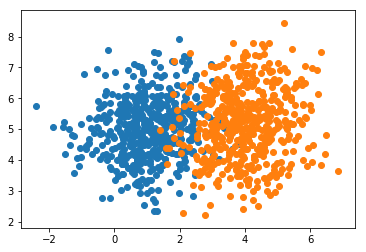

In [37]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])

plt.show()

In [38]:
data = np.zeros((1000,3))
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,-1] = 1
print(data.shape)

(1000, 3)


In [39]:
np.random.shuffle(data)
data[:10]

array([[ 0.13958586,  5.63371402,  0.        ],
       [-0.40042335,  5.3746276 ,  0.        ],
       [ 2.25902188,  7.33911403,  0.        ],
       [ 4.88678338,  4.98000706,  1.        ],
       [ 4.67054441,  4.84063034,  1.        ],
       [ 2.04815081,  5.0107929 ,  0.        ],
       [ 5.0916012 ,  3.94256417,  1.        ],
       [ 3.63466066,  7.80180246,  1.        ],
       [ 4.23059916,  6.72475258,  1.        ],
       [ 0.32073787,  6.01064242,  0.        ]])

In [49]:
split =700

X_train = data[:split,:2]
X_test = data[split:,:2]

y_train = data[:split,:1]
y_test = data[split:,:1]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 2) (700, 1)
(300, 2) (300, 1)


In [50]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))
def hypothesis(X,W,b):
    h = (X*W).sum() + b
    return sigmoid(h)
#Binary cross_Entropy
def log_likelihood(X,W,b,y_true):
    total = 0.0
    m = X.shape[0]
    for i in range(m):
        if y_true[i] == 0:
            total += np.log(1-hypothesis(X[i],W,b))
        else:
            total += np.log(hypothesis(X[i],W,b))
            
    total /= m
    return total

In [51]:
def gradient_ascent(X, W, b, y_true, learning_rate=0.1):
    gradW = np.zeros(2)
    gradB  = 0.0
    
    m = X.shape[0]
    for i in range(m):
        gradW += (y_true[i] - hypothesis(X[i],W,b)) * (X[i])
        gradB += (y_true[i] - hypothesis(X[i],W,b))
    gradW /= m
    gradB /= m
    
    W += learning_rate * gradW
    b += learning_rate * gradB
    
    logs = log_likelihood(X,W,b,y_true)
    return W,b,logs

In [52]:
W = np.array([0.5,0.5])
b = 4.2
log_likes = []
for i in range(400):
    W,b, logs = gradient_ascent(X_train,W,b,y_train,learning_rate=0.1)
    log_likes.append(logs)
print(b)
print(W)

[64.70178151]
[280.7456598  321.03521238]


[0.]


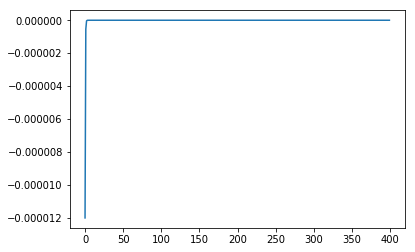

In [53]:
print(log_likes[-1])
plt.plot(log_likes)
plt.show()

In [68]:
def predict(x_sample,W,b):
    conf = hypothesis(x_sample,W,b)
    if (conf > 0.5):
        return 1
    else:
        return 0
    

In [69]:
def score(X_test,y_test,W,b):
    preds = []
    m = X_test.shape[0]
    for i in range(m):
        p = predict(X_test[i],W,b)
        preds.append(p)
    preds = np.asarray(preds)
    print((preds==y_test))
    return 100*(preds==y_test).sum()/m

In [70]:
score(X_test,y_test,W,b)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


0.0

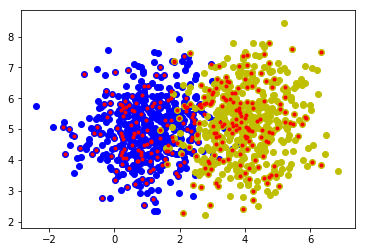

In [67]:
plt.scatter(dist1[:,0],dist1[:,1],color='b')
plt.scatter(dist2[:,0],dist2[:,1],color='y')

m=X_test.shape[0]
for i in range(m):
    x = X_test[i]
    p = predict(x,W,b)
    if p ==0:
        plt.plot(x[0],x[1],'b.')
    else:
        plt.plot(x[0],x[1],'r.')
        
plt.show()